# Practice : making a two-layer neural network

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n0, n1)
    W2 = np.random.randn(n1, n2)
    b1 = np.random.randn(n1, 1)
    b2 = np.random.randn(n2, 1)

    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }

    return parameters

In [17]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    Z1 = np.dot(W1.T, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = np.dot(W2.T, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2,
    }

    return activations

In [18]:
from sklearn.metrics import log_loss, accuracy_score

In [19]:
def back_propagation(X, y, parameters, activations):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    A1 = activations['A1']
    A2 = activations['A2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.dot(dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {
        'dW1': dW1,
        'dW2': dW2,
        'db1': db1,
        'db2': db2
    }
    return gradients

In [20]:
def update(parameters, gradients, learning_rate):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2

    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }

    return parameters

In [21]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [22]:
def neural_network(X_train, y_train, n1, learning_rate, epoch):

    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    
    parameters = initialisation(n0, n1, n2)

    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []

    for i in range(epoch):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(X_train, y_train, parameters, activations)
        parameters = update(parameters, gradients, learning_rate)

        if i % 100 == 0:
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parameters)
            train_accuracy.append(accuracy_score(y_train.flatten(), y_pred.flatten()))


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    #plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='train acc')
    #plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return parameters

# Dataset

In [23]:
from sklearn.datasets import make_circles

dimension de X: (100, 2)
dimension de y: (100, 1)


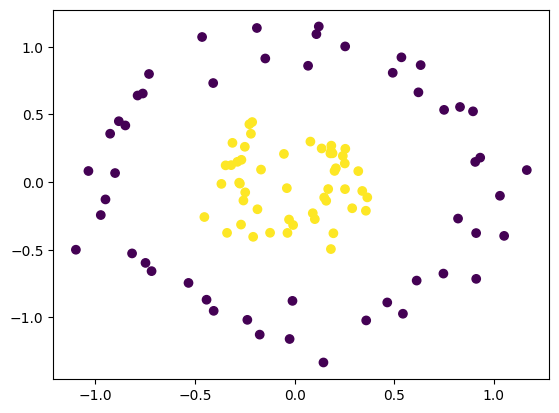

In [51]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=0, factor=0.3)
y = y.reshape((y.shape[0], 1))

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()